# Initial data analysis

In [93]:
# Packages
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline


In [94]:
# Define column names for movie.metadata.tsv
movie_metadata_columns = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie name", "Movie release date",
                          "Movie box office revenue", "Movie runtime", "Movie languages", "Movie countries", "Movie genres"]

# Read movie.metadata.tsv into a DataFrame
movie_metadata_df = pd.read_csv("../data/movie.metadata.tsv", sep='\t', header=None, names=movie_metadata_columns)

# Define column names for name.clusters.txt
name_clusters_columns = ["Movie name", "Freebase Movie ID"]

# Read name.clusters.txt into a DataFrame
name_clusters_df = pd.read_csv("../data/name.clusters.txt", sep='\t', header=None, names=name_clusters_columns)

# Define column names for character.metadata.tsv
character_metadata_columns = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie release date", "Character name",
                              "Actor DOB", "Actor gender", "Actor height", "Actor ethnicity","Actor name",
                              "Actor age at movie release", "x", "y","z",]

# Read character.metadata.tsv into a DataFrame
character_metadata_df = pd.read_csv("../data/character.metadata.tsv", sep='\t', header=None, names=character_metadata_columns)


### Let's explore the Movie Metadata dataset 
First we display the dataframe

In [95]:
movie_metadata_df.head(5)

,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


We can see that  `Movie languages`, `Movie countries` and `Movie genres` include a Freebase code ID. We want to remove this

In [96]:
# Function to extract genre names without Freebase codes
def extract_genre_names(genre_dict):
    genre_names = []
    for code, name in genre_dict.items():
        genre_names.append(name)
    return ", ".join(genre_names)

# Clean the "Movie genres" column
movie_metadata_df["Movie genres"] = movie_metadata_df["Movie genres"].apply(eval)  # Convert string representation of dictionary to actual dictionary
movie_metadata_df["Movie genres"] = movie_metadata_df["Movie genres"].apply(extract_genre_names)

# Clean the "Movie languages" column (assuming similar structure to genres column)
movie_metadata_df["Movie languages"] = movie_metadata_df["Movie languages"].apply(eval)
movie_metadata_df["Movie languages"] = movie_metadata_df["Movie languages"].apply(lambda x: ", ".join(x.values()))

# Clean the "Movie countries" column (assuming similar structure to genres column)
movie_metadata_df["Movie countries"] = movie_metadata_df["Movie countries"].apply(eval)
movie_metadata_df["Movie countries"] = movie_metadata_df["Movie countries"].apply(lambda x: ", ".join(x.values()))


Now the `movie_metadata_df` has been cleaned a little bit. Let's look at it 

In [97]:
movie_metadata_df.head(5)

,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"Crime Fiction, Drama"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,Drama


Let's see if there is any date missing in the dataframe

In [98]:
print('NaNs for movie dataset')
print(movie_metadata_df.isna().sum())

print('\n Percentage of NaNs for movie dataset')
print(movie_metadata_df.isna().mean() * 100)

NaNs for movie dataset
Wikipedia Movie ID              0
Freebase Movie ID               0
Movie name                      0
Movie release date           6902
Movie box office revenue    73340
Movie runtime               20450
Movie languages                 0
Movie countries                 0
Movie genres                    0
dtype: int64

 Percentage of NaNs for movie dataset
Wikipedia Movie ID           0.000000
Freebase Movie ID            0.000000
Movie name                   0.000000
Movie release date           8.443743
Movie box office revenue    89.722416
Movie runtime               25.018045
Movie languages              0.000000
Movie countries              0.000000
Movie genres                 0.000000
dtype: float64


It looks like we might have a problem with the `Movie release date`, `Movie box office revenue` and `Movie runtime` date. 

What can we do to mitigate this error. Let's first look at the release date.

**Movie release date**

The movie release data has both entries where only the release year is given and entries where the release date is also given. 

We also have some missing data

In [99]:
movie_metadata_df['Movie release date']

0        2001-08-24
1        2000-02-16
2              1988
3              1987
4              1983
            ...    
81736    2011-03-19
81737    2011-01-21
81738    1972-09-22
81739    1992-05-21
81740          2002
Name: Movie release date, Length: 81741, dtype: object

In [100]:
# Extract year from release year 
movie_metadata_df["Movie release year"] = movie_metadata_df["Movie release date"].str.split('-').str[0].astype('Int64')

movie_metadata_df.head(5)

,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"Crime Fiction, Drama",1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,Drama,1983


In [113]:
# See years
years = movie_metadata_df['Movie release year'].unique()
np.sort(years.fillna(0))

array([0, 1010, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896,
       1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907,
       1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918,
       1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929,
       1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940,
       1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=object)

In [114]:
# Find movies from 1010
movie_metadata_df[movie_metadata_df['Movie release year']==1010]

,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year
62836,29666067,/m/0fphzrf,Hunting Season,1010-12-02,12160978.0,140.0,"Turkish Language, English Language",Turkey,"Crime Fiction, Mystery, Drama, Thriller",1010


In [102]:
# Replace 1010 with 2010

#movie_metadata_df[movie_metadata_df['Movie release year'] == 1010] = 2010

In [103]:
movie_metadata_df['Movie release year'].value_counts(dropna=False)

Movie release year
<NA>    6902
2008    2465
2006    2434
2007    2389
2009    2247
        ... 
1904       1
1893       1
1889       1
1888       1
1010       1
Name: count, Length: 131, dtype: Int64

There might also be some missing data. Let's check. 

In [104]:
def missing_data(df, column):
    percentage_data_missing = df[column].isna().sum()/df[column].shape[0]
    print('Percentage of missing',column,'data:', round(percentage_data_missing *100,2),"%")
    print('Percentage of',column,'data available:', round(100-percentage_data_missing *100,2),"%")
    print(column,'data not available:',df[column].isna().sum())
    print(column,'data available:',df[column].count())
    
    return 

missing_data(movie_metadata_df,'Movie release date')

Percentage of missing Movie release date data: 8.44 %
Percentage of Movie release date data available: 91.56 %
Movie release date data not available: 6902
Movie release date data available: 74839


Indeed 

In [105]:
# get top 10 most frequent names
n = 20
movie_metadata_df['Movie release date'].value_counts()[:n].index.tolist()

['2006',
 '2007',
 '2008',
 '2005',
 '2004',
 '2009',
 '2003',
 '2002',
 '2000',
 '2001',
 '2010',
 '1999',
 '1965',
 '1998',
 '1997',
 '1988',
 '1993',
 '1989',
 '1996',
 '1973']

**Let's take a look at the `Movie box office revenue`**
It looks like there is some missing data. Let´s count it

In [106]:
missing_data(movie_metadata_df,'Movie box office revenue')

Percentage of missing Movie box office revenue data: 89.72 %
Percentage of Movie box office revenue data available: 10.28 %
Movie box office revenue data not available: 73340
Movie box office revenue data available: 8401


We only have 8401 revenue data points. We can still try to analyse this data


In [107]:
movie_metadata_df['Movie box office revenue'].describe()

count    8.401000e+03
mean     4.799363e+07
std      1.121753e+08
min      1.000000e+04
25%      2.083193e+06
50%      1.063969e+07
75%      4.071696e+07
max      2.782275e+09
Name: Movie box office revenue, dtype: float64

<Axes: >

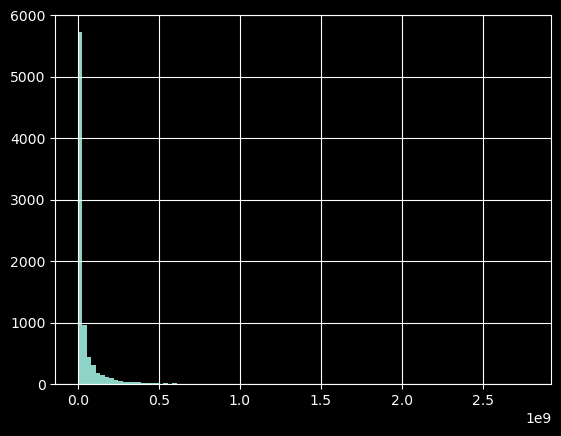

In [108]:
movie_metadata_df['Movie box office revenue'].hist(bins=100)

<Axes: >

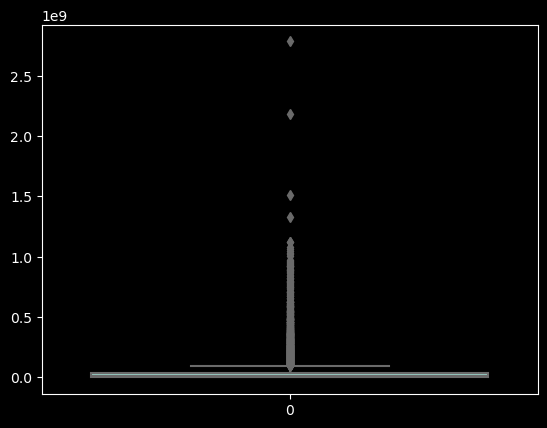

In [109]:
box_office_revenue_filtered = movie_metadata_df.copy().dropna(subset = ['Movie box office revenue'])
sns.boxplot(box_office_revenue_filtered['Movie box office revenue'])

In [110]:
box_office_revenue_filtered

,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,English Language,United States of America,"Musical, Comedy, Black-and-white",1938
13,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,English Language,United Kingdom,"Costume drama, War film, Epic, Period piece, D...",1989
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,English Language,United States of America,"Children's/Family, Musical, Fantasy, Comedy, D...",1964
21,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,English Language,United States of America,"Thriller, Science Fiction, Future noir, Indie,...",1999
...,...,...,...,...,...,...,...,...,...,...
81695,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,English Language,United States of America,"Romantic comedy, Comedy of manners, Drama, Com...",1988
81720,7761830,/m/0kvgqb,Spaced Invaders,1990,15369573.0,100.0,English Language,United States of America,"Alien Film, Science Fiction, Family Film, Come...",1990
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"Italian Language, English Language","France, United States of America","Parody, Americana, Comedy",2000
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,,United States of America,"Thriller, Erotic thriller, Psychological thril...",1993


**Movie genres**

In [111]:
# Count the number of movies per genre
genre_counts = pd.DataFrame(movie_metadata_df["Movie genres"].str.split(", ").explode().value_counts())

print("Number of Movies per Genre:")
genre_counts

Number of Movies per Genre:


,count
Movie genres,
Drama,34007
Comedy,16349
Romance Film,10234
Black-and-white,9094
Action,8798
...,...
Romantic thriller,1
Comdedy,1
C-Movie,1


In [112]:
genre_counts.describe()

,count
count,364.000000
mean,674.788462
std,2422.971760
min,1.000000
25%,13.000000
50%,65.500000
75%,287.000000
max,34007.000000
